In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import graphviz 
from sklearn.model_selection import train_test_split
import math
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('play_tennis.csv')
df = df.drop(["day"], axis=1)

In [50]:
Y = df["play"]
X = df.drop(["play"], axis=1)

feature_names = X.columns
labels = Y.unique()

In [51]:
le = LabelEncoder()
for i in X.columns:  
    X[i] = le.fit_transform(X[i])

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

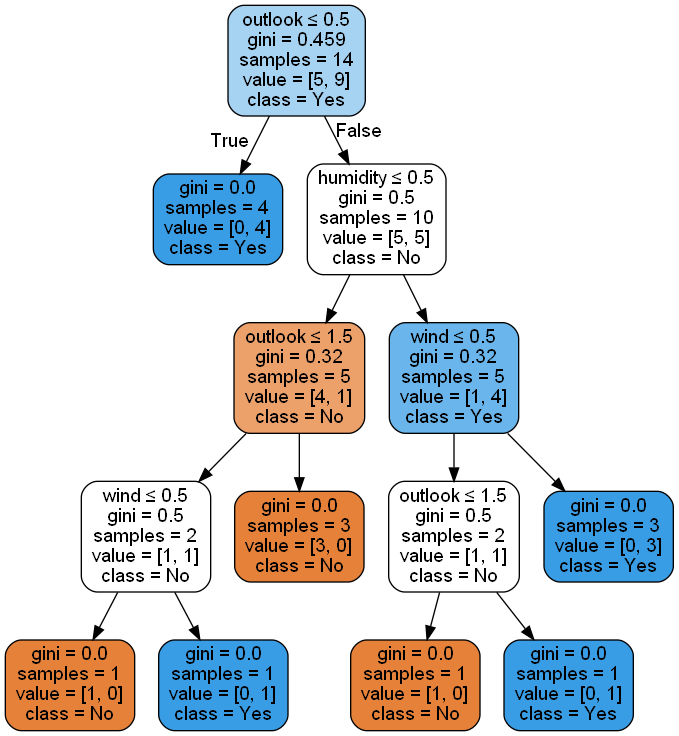

In [53]:
# Tree using graphviz
tree.export_graphviz(clf,            
             class_names=labels,
             feature_names=feature_names,
             filled=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

[Text(0.4444444444444444, 0.9, 'outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.5555555555555556, 0.7, 'humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.3333333333333333, 0.5, 'outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(0.2222222222222222, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.7777777777777778, 0.5, 'wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.6666666666666666, 0.3, 'outlook <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No')

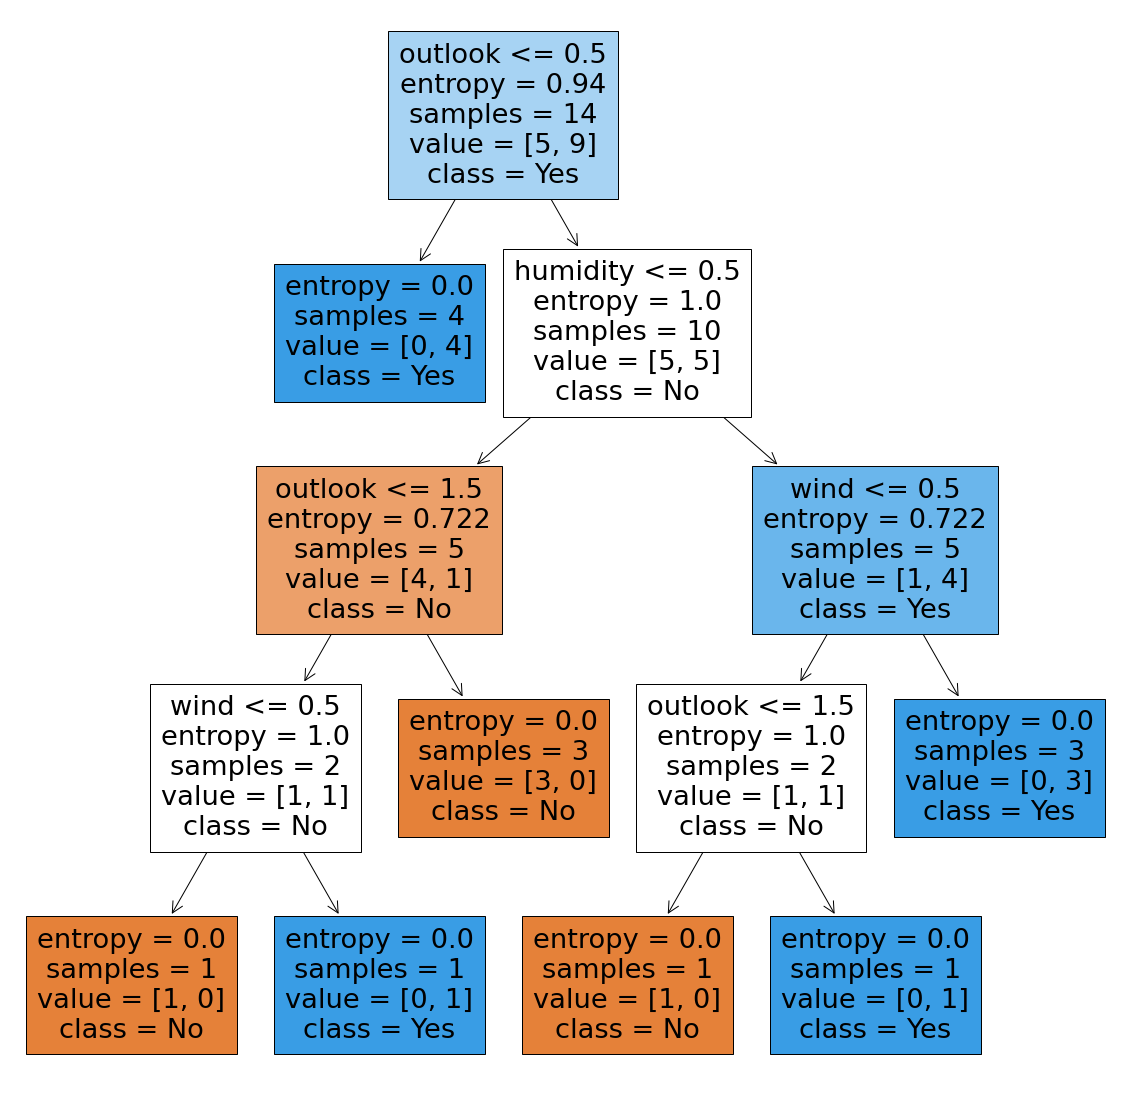

In [54]:
# Tree using matplotlib
plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=feature_names, class_names=labels, filled = True)